In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [28]:
import kagglehub

# Download latest version
data_dir = kagglehub.dataset_download("carlosrunner/pizza-not-pizza")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1


In [29]:
import os
for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

There are 1 directories and 0 files in '/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1'.
There are 2 directories and 1 files in '/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza'.
There are 0 directories and 983 files in '/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/pizza'.
There are 0 directories and 983 files in '/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/not_pizza'.


In [34]:
data_dir = '/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza'
data_dir

'/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza'

In [35]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza')

In [39]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

1966

In [74]:
pizza= list(data_dir.glob('pizza/*'))
not_pizza= list(data_dir.glob('not_pizza/*'))

len(not_pizza)

In [43]:
pizza[:5]

[PosixPath('/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/pizza/1097980.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/pizza/397910.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/pizza/140031.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/pizza/1944600.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/pizza/665900.jpg')]

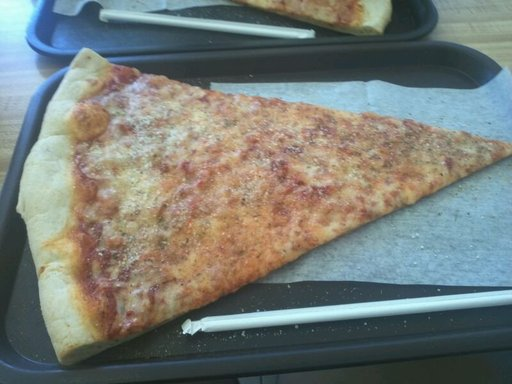

In [75]:
import PIL

PIL.Image.open(str(pizza[4]))

In [76]:
categories_dict = {'pizza' : list(data_dir.glob('pizza/*')),
                   'not_pizza' : list(data_dir.glob('not_pizza/*')) }

labels_dict = {'pizza' : 0,
               'not_pizza' : 1}

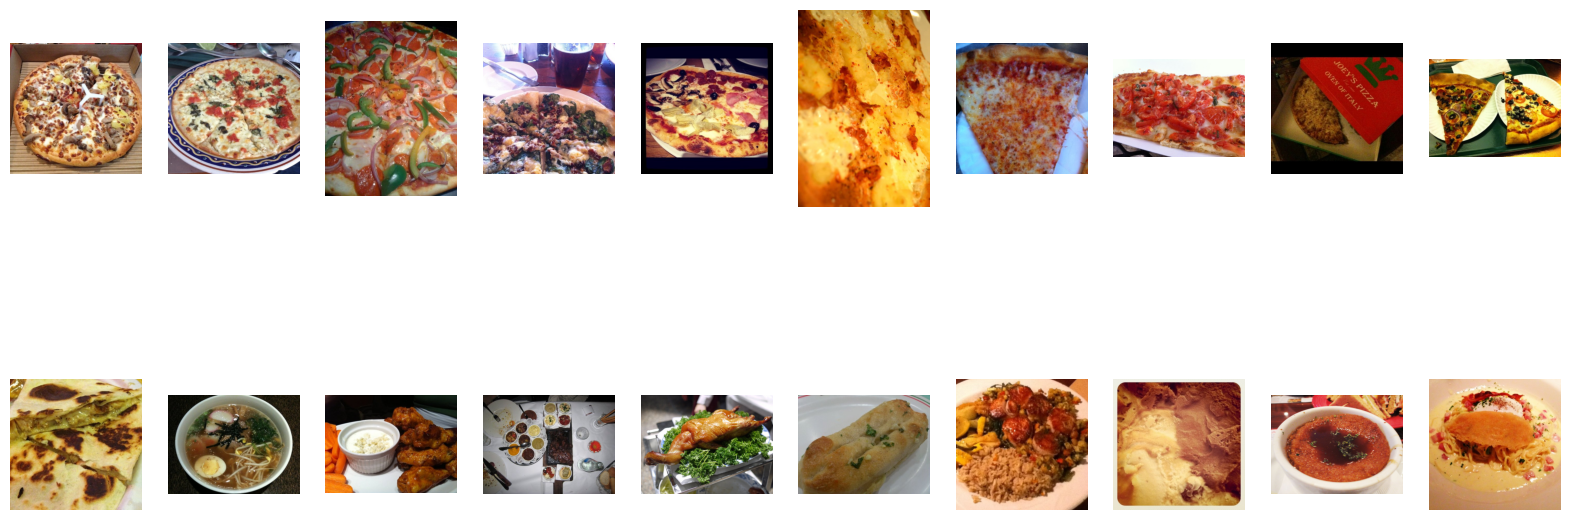

In [78]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_random_images(categories_dict, labels_dict):
    # Create a figure for displaying images
    plt.figure(figsize=(20, 8))

    # Show 10 random images from the "pizza" folder
    pizza_images = random.sample(categories_dict['pizza'], 10)
    index = 1  # Start index for the first row
    for image_path in pizza_images:
        plt.subplot(2, 10, index)  # First row
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.xlabel(labels_dict['pizza'], fontsize=10, color='blue')
        index += 1  # Increment index for the next subplot

    # Show 10 random images from the "not_pizza" folder
    not_pizza_images = random.sample(categories_dict['not_pizza'], 10)
    index = 11  # Start index for the second row
    for image_path in not_pizza_images:
        plt.subplot(2, 10, index)  # Second row
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.xlabel(labels_dict['not_pizza'], fontsize=10, color='red')
        index += 1  # Increment index for the next subplot

    #show plot
    plt.show()

# Call the function
show_random_images(categories_dict, labels_dict)


In [51]:
str(categories_dict['pizza'][0])

'/root/.cache/kagglehub/datasets/carlosrunner/pizza-not-pizza/versions/1/pizza_not_pizza/pizza/1097980.jpg'

In [52]:
import cv2

img = cv2.imread(str(categories_dict['pizza'][0]))

array([[[243, 213, 232],
        [244, 214, 233],
        [242, 212, 231],
        ...,
        [150, 123, 166],
        [135, 107, 153],
        [145, 117, 163]],

       [[239, 209, 228],
        [241, 211, 230],
        [240, 210, 229],
        ...,
        [111,  84, 128],
        [108,  80, 126],
        [101,  73, 119]],

       [[237, 207, 226],
        [240, 210, 229],
        [240, 210, 229],
        ...,
        [ 98,  71, 115],
        [112,  84, 130],
        [ 98,  69, 118]],

       ...,

       [[214, 189, 215],
        [216, 191, 217],
        [222, 196, 220],
        ...,
        [233, 194, 202],
        [232, 193, 201],
        [231, 192, 200]],

       [[219, 193, 217],
        [219, 193, 217],
        [224, 195, 220],
        ...,
        [230, 191, 199],
        [226, 187, 195],
        [224, 185, 193]],

       [[225, 199, 223],
        [222, 196, 220],
        [225, 195, 220],
        ...,
        [228, 189, 197],
        [222, 183, 191],
        [218, 179, 187]]], dtype=uint8)
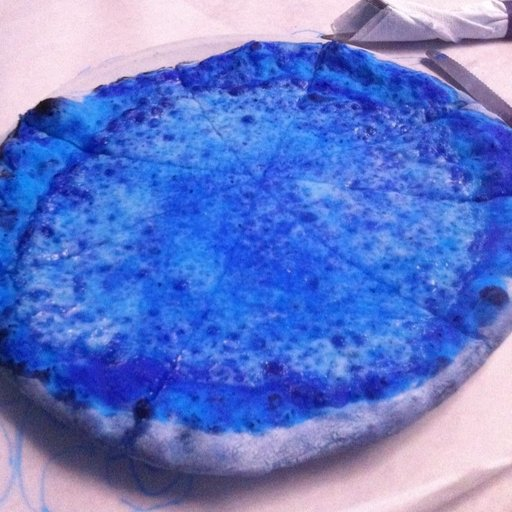

In [53]:
img

In [54]:
img.shape

(512, 512, 3)

In [56]:
X, y = [], []
for category, images in categories_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img, (180,180))
    X.append(resized_image)
    y.append(labels_dict[category])


In [61]:
X=np.array(X)
y=np.array(y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [63]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [79]:
X_train_scaled.shape

(1572, 180, 180, 3)

In [81]:
y_train[1000]

1

In [83]:
num_classes = 2

model = models.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(180, 180, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=15, validation_data=(X_test_scaled, y_test))

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5873 - loss: 0.6889 - val_accuracy: 0.5939 - val_loss: 0.6587
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6504 - loss: 0.6077 - val_accuracy: 0.7563 - val_loss: 0.5340
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7702 - loss: 0.5115 - val_accuracy: 0.7487 - val_loss: 0.5148
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7856 - loss: 0.4806 - val_accuracy: 0.6929 - val_loss: 0.6043
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7865 - loss: 0.4452 - val_accuracy: 0.7792 - val_loss: 0.4736
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8826 - loss: 0.2929 - val_accuracy: 0.7640 - val_loss: 0.5294
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9329 - loss: 0.1801 - val_accuracy: 0.7538 - val_loss: 0.6973
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9080 - loss: 0.2160 - val_accuracy: 0.7259 - val_loss:

13/13 - 4s - 272ms/step - accuracy: 0.7487 - loss: 0.9825


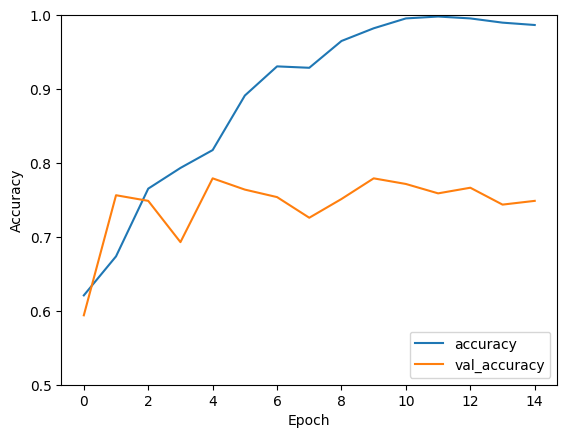

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_scaled,  y_test, verbose=2)

In [88]:
model.evaluate(X_test_scaled,  y_test, verbose=2)

13/13 - 5s - 361ms/step - accuracy: 0.7487 - loss: 0.9825


[0.9825277328491211, 0.7487309575080872]

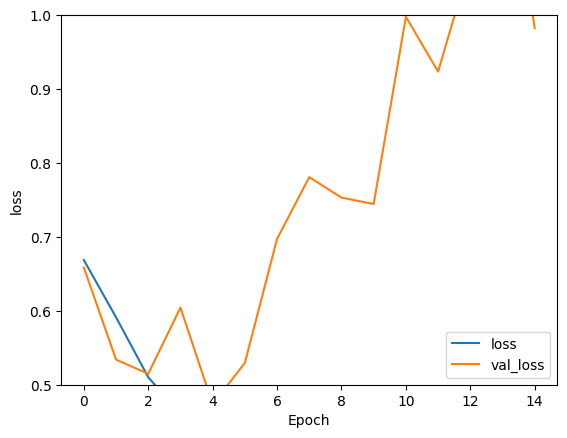

In [89]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [91]:
predictions=model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step


In [92]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.92381775, 0.07618219], dtype=float32)>

In [93]:
np.argmax(score)

0

In [94]:
y_test[0]

0

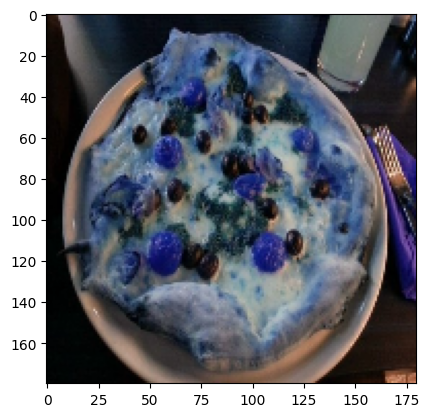

In [101]:
plt.imshow(X_test_scaled[0])